# Understanding whether the edge constraint is making solve convex restriction fail

In [1]:
from large_gcs.geometry.point import Point
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.cost_constraint_factory import (
    create_2d_x_equality_edge_constraint,
    create_2d_y_equality_edge_constraint,
    create_l2norm_edge_cost,
    create_l2norm_squared_edge_cost,
)
from large_gcs.graph.graph import DefaultGraphCostsConstraints, Edge, Graph

##  Two point graphs

In [2]:
def create_two_point_hor_graph(add_constraint=False) -> Graph:
    G = Graph()
    sets = (
        Point((0, 0)),
        Point((1, 0)),
    )
    vertex_names = ("s", "t")
    G.add_vertices_from_sets(sets, names=vertex_names)
    G.set_source("s")
    G.set_target("t")
    if add_constraint:
        G.add_edge(Edge("s", "t", constraints=[create_2d_y_equality_edge_constraint()]))
    else:
        G.add_edge(Edge("s", "t"))
    return G

In [3]:
# No constraint
G = create_two_point_hor_graph(add_constraint=False)
G.solve_convex_restriction(G.edge_keys)

100%|██████████| 2/2 [00:00<00:00, 12210.49it/s]


ShortestPathSolution(is_success=True, cost=0.0, time=0.0020538229728117585, vertex_path=['s', 't'], ambient_path=[array([0., 0.]), array([1., 0.])], flows=[], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f7c4bb9cc70>)

In [4]:
# With constraint
G = create_two_point_hor_graph(add_constraint=False)
G.solve_convex_restriction(G.edge_keys)

100%|██████████| 2/2 [00:00<00:00, 14169.95it/s]


ShortestPathSolution(is_success=True, cost=0.0, time=4.4204003643244505e-05, vertex_path=['s', 't'], ambient_path=[array([0., 0.]), array([1., 0.])], flows=[], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f7c4a27dd70>)

In [5]:
def create_two_point_ver_graph(add_constraint=False) -> Graph:
    G = Graph()
    sets = (
        Point((0, 0)),
        Point((0, 1)),
    )
    vertex_names = ("s", "t")
    G.add_vertices_from_sets(sets, names=vertex_names)
    G.set_source("s")
    G.set_target("t")
    if add_constraint:
        G.add_edge(Edge("s", "t", constraints=[create_2d_x_equality_edge_constraint()]))
    else:
        G.add_edge(Edge("s", "t"))
    return G

In [6]:
# No constraint
G = create_two_point_ver_graph(add_constraint=False)
G.solve_convex_restriction(G.edge_keys)

100%|██████████| 2/2 [00:00<00:00, 7951.29it/s]


ShortestPathSolution(is_success=True, cost=0.0, time=4.4248008634895086e-05, vertex_path=['s', 't'], ambient_path=[array([0., 0.]), array([0., 1.])], flows=[], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f7c567bfc30>)

In [7]:
# With constraint
G = create_two_point_ver_graph(add_constraint=True)
G.solve_convex_restriction(G.edge_keys)

100%|██████████| 2/2 [00:00<00:00, 5957.82it/s]


ShortestPathSolution(is_success=True, cost=0.0, time=4.998204531148076e-05, vertex_path=['s', 't'], ambient_path=[array([0., 0.]), array([0., 1.])], flows=[], result=<pydrake.solvers.MathematicalProgramResult object at 0x7f7c31da1030>)

## three point graphs

In [28]:
def create_three_point_graph(add_constraint=False) -> Graph:
    G = Graph()
    sets = (
        Point((0, 0)),
        Polyhedron.from_vertices([[1, -1], [2, -1], [2, 1], [1, 1]]),
        # Point((2,0)),
        # Point((3,0)),
        Point((1.5, 0.8)),
    )
    vertex_names = ("s", "a", "t")
    G.add_vertices_from_sets(sets, names=vertex_names)
    G.set_source("s")
    G.set_target("t")
    if add_constraint:
        G.add_edge(Edge("s", "a", constraints=[create_2d_y_equality_edge_constraint()]))
        G.add_edge(Edge("a", "t"))
    else:
        G.add_edge(Edge("s", "a"))
        G.add_edge(Edge("a", "t"))
    return G

100%|██████████| 3/3 [00:00<00:00, 15160.13it/s]

is_success: True, cost: 0, time: 5.63e-05, vertex_path: ['s', 'a', 't'], ambient_path: [array([0., 0.]), array([ 1., -1.]), array([1.5, 0.8])], flows: [], result: <pydrake.solvers.MathematicalProgramResult object at 0x7f7c304cdef0>


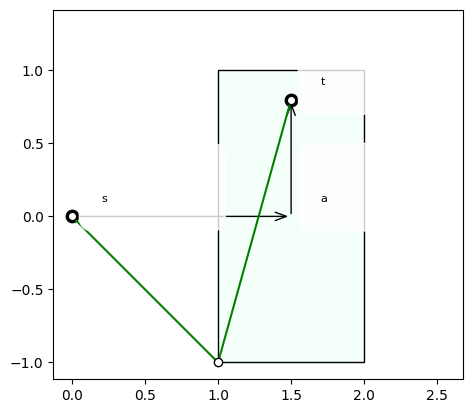

In [29]:
# No constraint
G = create_three_point_graph(add_constraint=False)
G.plot_sets()
G.plot_set_labels()
G.plot_edges()
sol = G.solve_convex_restriction(G.edge_keys)
print(sol)
G.plot_path(sol.ambient_path)

100%|██████████| 3/3 [00:00<00:00, 9931.26it/s]


is_success: True, cost: 0, time: 8.3e-05, vertex_path: ['s', 'a', 't'], ambient_path: [array([0., 0.]), array([ 1., -0.]), array([1.5, 0.8])], flows: [], result: <pydrake.solvers.MathematicalProgramResult object at 0x7f7c304e1170>


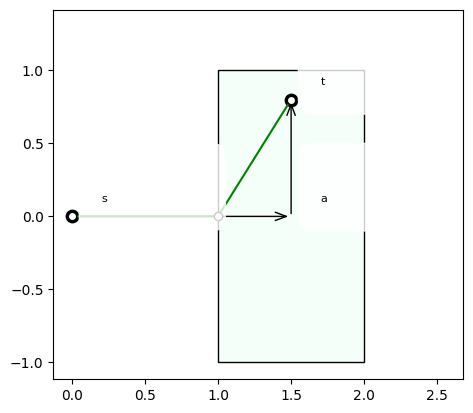

In [30]:
# With constraint
G = create_three_point_graph(add_constraint=True)
G.plot_sets()
G.plot_set_labels()
G.plot_edges()
sol = G.solve_convex_restriction(G.edge_keys)
print(sol)
G.plot_path(sol.ambient_path)

The constraint issue has been resolved, but the l2norm vs l2norm squared cost issue is still unresolved